**Nama anggota kelompok :**
1. Aurellia Gea Lintang Pratiwi – A12.2018.06063 – UDINUS (Non Active)
2. Intan Juniar A12.2018.06064 – UDINUS
3. Yunia Nur Anisa A12.2018.06096 – UDINUS
**Universitas Host :** UDINUS | 
 **Kelas :** Microdential Data Science UDINUS 04


---



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('/content/TA _ Gizi - Sheet2.csv')
df.sample(5)

,NO,KABUPATEN,PUSKESMAS,JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG,BALITA GIZI KURANG (BB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN,BALITA PENDEK (TB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR,BALITA KURUS (BB/TB),TAHUN,JULAH KASUS,AKSI
27,28,Lombok Utara,8,18666,3521,18412,6223,18516,1133,2020,44717,Pemantauan
17,18,Lombok Utara,8,1830,458,1830,746,1830,217,2019,4069,Pemantauan
10,11,Lombok Barat,19,27,4,27,9,27,0,2019,68,Pemantauan
3,4,Sumbawa,25,35278,3191,35278,5160,35278,1137,2018,96346,Sosialisasi
26,27,Sumbawa Barat,9,10767,1562,10767,1627,10767,745,2020,28367,Pemantauan


In [5]:
# Drop KABUPATEN untuk mendapatkan data numerik saja dimana no mewakili KABUPATEN
df1 = df.drop('KABUPATEN', axis=1)
df1.sample(5)

,NO,PUSKESMAS,JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG,BALITA GIZI KURANG (BB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN,BALITA PENDEK (TB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR,BALITA KURUS (BB/TB),TAHUN,JULAH KASUS,AKSI
20,21,20,47840,9067,46555,13647,46867,2285,2020,116263,Sosialisasi
25,26,21,38006,6743,37453,8431,37776,5059,2020,93002,Sosialisasi
23,24,26,36709,3864,36821,4019,36829,1425,2020,101051,Sosialisasi
14,15,9,8308,1594,8308,3198,8308,698,2019,19434,Pemantauan
19,20,7,49,8,49,17,49,5,2019,117,Pemantauan


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   NO                                                 30 non-null     int64 
 1   PUSKESMAS                                          30 non-null     int64 
 2   JUMLAH BALITA
0-59 BULAN YANG DITIMBANG            30 non-null     int64 
 3   BALITA GIZI KURANG (BB/U)                          30 non-null     int64 
 4   JUMLAH BALITA
0-59 BULAN YANG DIUKUR TINGGI BADAN  30 non-null     int64 
 5   BALITA PENDEK (TB/U)                               30 non-null     int64 
 6   JUMLAH BALITA
0-59 BULAN YANG DIUKUR               30 non-null     int64 
 7   BALITA KURUS (BB/TB)                               30 non-null     int64 
 8   TAHUN                                              30 non-null     int64 
 9   JULAH KASUS            

In [7]:
def AKSI(status):
  if status == "Sosialisasi":
    return 1
  else:
    return 2
  
actualScore = list(df1["AKSI"])
positiveNegative = list(map(AKSI, actualScore))
df1['AKSI'] = positiveNegative

In [8]:
df1.sample(5)

,NO,PUSKESMAS,JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG,BALITA GIZI KURANG (BB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN,BALITA PENDEK (TB/U),JUMLAH BALITA\n0-59 BULAN YANG DIUKUR,BALITA KURUS (BB/TB),TAHUN,JULAH KASUS,AKSI
17,18,8,1830,458,1830,746,1830,217,2019,4069,2
4,5,9,21116,13041,21116,2185,21116,27,2018,48095,2
27,28,8,18666,3521,18412,6223,18516,1133,2020,44717,2
3,4,25,35278,3191,35278,5160,35278,1137,2018,96346,1
5,6,21,35213,6089,35213,3999,35213,3236,2018,92315,1


In [9]:
# describing stats of variables
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
NO,30.0,15.500000,8.803408,1.0,8.25,15.5,22.75,30.0
PUSKESMAS,30.0,16.966667,9.076242,7.0,9.00,15.0,25.00,35.0
JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG,30.0,26269.700000,26577.675127,27.0,6552.25,17794.0,36351.25,106879.0
BALITA GIZI KURANG (BB/U),30.0,4019.800000,3934.218780,4.0,809.25,2780.0,6579.50,13041.0
JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN,30.0,26056.666667,26589.960778,27.0,6552.25,17248.0,36435.25,106218.0
BALITA PENDEK (TB/U),30.0,5295.700000,6185.850780,9.0,873.75,2691.5,7879.00,20513.0
JUMLAH BALITA\n0-59 BULAN YANG DIUKUR,30.0,26148.300000,26412.043186,27.0,6552.25,17300.0,36441.25,106618.0
BALITA KURUS (BB/TB),30.0,1337.433333,1466.115573,0.0,307.50,721.5,1768.50,5059.0
TAHUN,30.0,2019.000000,0.830455,2018.0,2018.00,2019.0,2020.00,2020.0
JULAH KASUS,30.0,67821.733333,69577.458445,68.0,16821.75,42708.5,95510.00,287123.0


In [10]:
df1.shape

(30, 11)

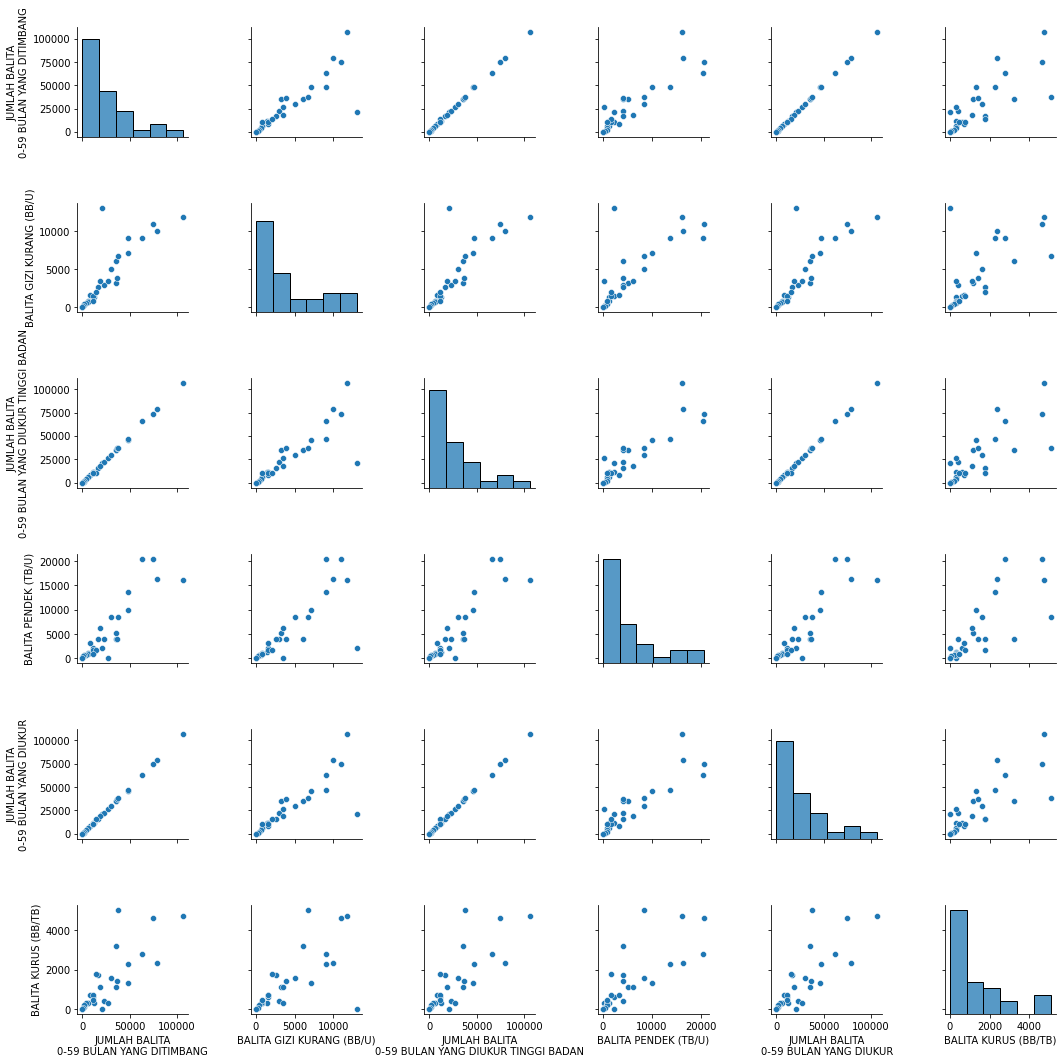

In [11]:
sns.pairplot(df1[['JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG', 'BALITA GIZI KURANG (BB/U)', 'JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN', 'BALITA PENDEK (TB/U)', 'JUMLAH BALITA\n0-59 BULAN YANG DIUKUR',  'BALITA KURUS (BB/TB)']])

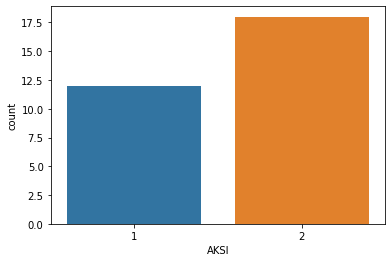

In [12]:
# Melihat distribusi data dari target classes --> Aksi
sns.countplot(df1["AKSI"])

In [14]:
#Let's create numpy arrays for features and target
X = df1.drop('AKSI',axis=1).values
y = df1['AKSI'].values

In [15]:
import sklearn
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

KNN = sklearn.neighbors.KNeighborsClassifier()
KNN.fit(X, y)

KNeighborsClassifier()

In [16]:
KNN.score(X, y)

1.0

In [17]:
import pickle

In [18]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(KNN, f)

In [19]:
with open('knn_model.pkl', 'rb') as f:
    KNN_loaded = pickle.load(f)

In [20]:
model = pickle.load(open('knn_model.pkl','rb'))

In [22]:
print(model.predict([[4, 25, 30000, 1500, 30000, 8900, 30000, 5600, 2021, 74000]]))

[1]


Inputan dalam prediksi :
1. KABUPATEN
2. PUSKESMAS	
3. JUMLAH BALITA\n0-59 BULAN YANG DITIMBANG	
4. BALITA GIZI KURANG (BB/U)	
5. JUMLAH BALITA\n0-59 BULAN YANG DIUKUR TINGGI BADAN
6. BALITA PENDEK (TB/U)	
7. JUMLAH BALITA\n0-59 BULAN YANG DIUKUR	
8. BALITA KURUS (BB/TB)	
9. TAHUN	
10. JULAH KASUS

NB : JUMLAH BALITA\n0-59 dalam 3 kategori selalu sama
